In [1]:
from datasets import load_dataset, load_from_disk
from transformers import AutoModelForSequenceClassification, DistilBertTokenizer
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_dataset("dariusbotusanu/ro_financial_phrasebank_v2")
tokenizer = DistilBertTokenizer.from_pretrained("racai/distilbert-base-romanian-cased", padding='max_length', max_length=45, truncation='max_length')

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=45)

# Tokenize the datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_train = tokenized_datasets['train']
tokenized_eval = tokenized_datasets['test_all_agree']

In [3]:
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("./model_directory/fine_tuned_model", num_labels=3)

In [4]:
def classify_sentences(model, tokenizer, sentences, labels=[0,1,2]):
    probabilities = list(map(lambda sentence: model(**tokenizer(sentence, return_tensors='pt'))[0].softmax(dim=-1).detach(), sentences))
    predictions = list(map(lambda x: labels[np.argmax(x)], probabilities))
    return predictions

In [5]:
eval_labels = tokenized_eval['label']
eval_predictions = classify_sentences(fine_tuned_model, tokenizer, tokenized_eval['text'])

train_labels = tokenized_train['label']
train_predictions = classify_sentences(fine_tuned_model, tokenizer, tokenized_train['text'])

In [6]:
cm_eval = confusion_matrix(eval_labels, eval_predictions)
cm_train = confusion_matrix(train_labels, train_predictions)

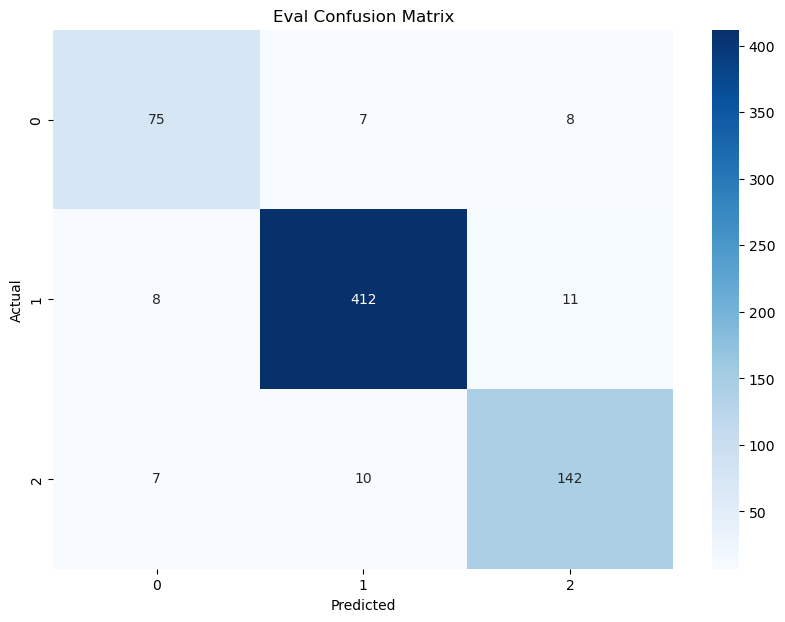

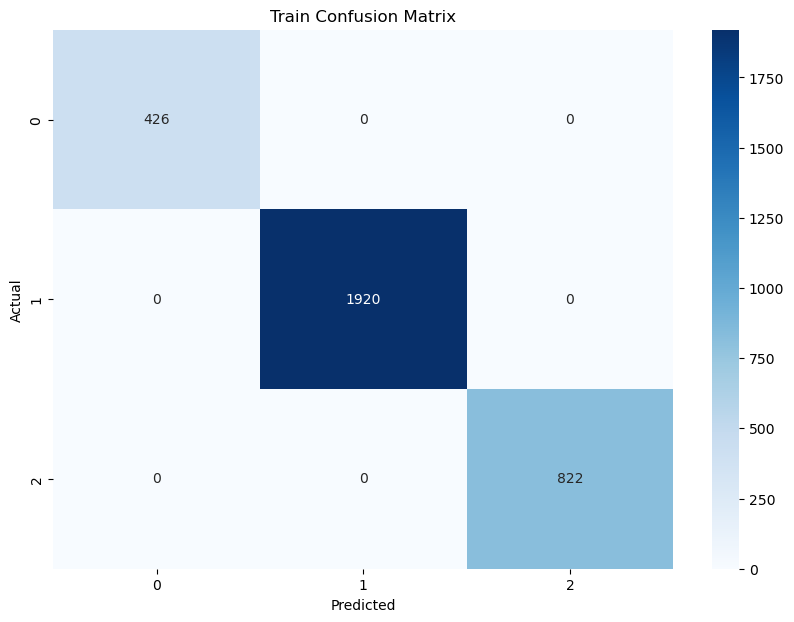

In [7]:
plt.figure(figsize=(10,7))

# Use seaborn to plot heatmap
sns.heatmap(cm_eval, annot=True, cmap='Blues', fmt='g')
plt.title('Eval Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

plt.figure(figsize=(10,7))

# Use seaborn to plot heatmap
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [52]:
cm_proc = np.ones((3,3))
for i in range(len(cm_eval)):
    cm_proc[i]=cm_eval[i]/(cm_eval.sum(axis=1)[i])

cm_proc *=100

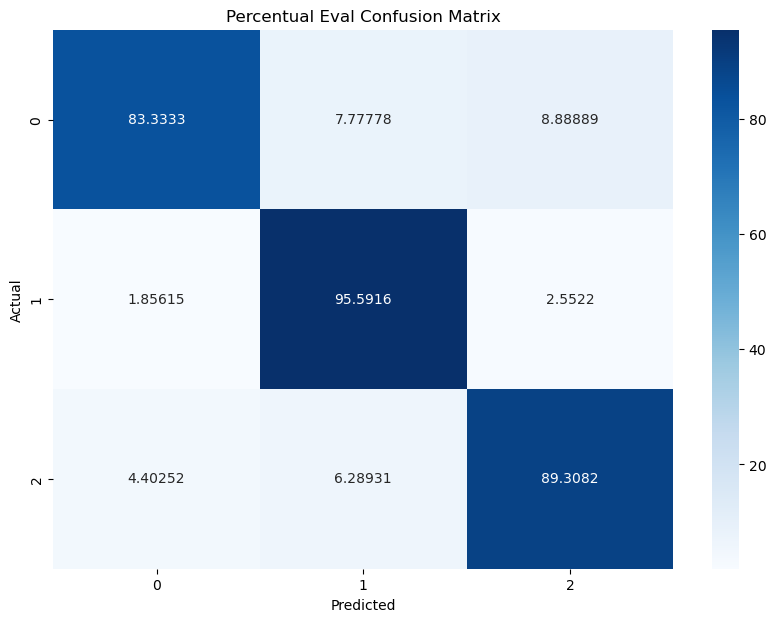

In [54]:
plt.figure(figsize=(10,7))

# Use seaborn to plot heatmap
sns.heatmap(cm_proc, annot=True, cmap='Blues', fmt='g')
plt.title('Percentual Eval Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [64]:
tokenized_eval[[i for i in range(len(eval_labels)) if eval_labels[i]==2 and eval_predictions[i]==0]]['text']

['Profitul consolidat al companiei s-a ridicat la 15,86 milioane de euro, în de la 4,14 milioane de euro pe an.',
 'producătorul finlandez de oțel Rautaruukki Oyj ( HEL : RTRKS ) , sau Ruukki , a declarat astăzi că pierderea sa netă s-a contractat la 49 milioane de euro ( 68,2 milioane de dolari ) pentru primele nouă luni ale anului 2010 de la 229 milioane de euro pentru aceeași perioadă a anului trecut .',
 'profitul operațional a totalizat 17,7 milioane EUR în cu 17,6 milioane EUR în perioada corespunzătoare din 2007 .',
 'Compania raportează o pierdere pentru perioada de 0,4 milioane EUR, comparativ cu o pierdere de 1,9 milioane EUR în perioada corespunzătoare din 2005 .',
 'Cu toate acestea, se ca volumele de vânzări din industria alimentară să rămână la niveluri relativ bune în Finlanda și în Scandinavia, a spus Atria.',
 'Fluxul de numerar din operațiuni a totalizat 2,71 milioane EUR , față de un negativ de 0,83 milioane EUR în perioada corespunzătoare din 2008 .',
 'Investitorii

In [ ]:
dataset